<a href="https://colab.research.google.com/github/tawfiqml/Computer-Vision-/blob/main/Problem_no_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please solve the below Tasks by implementing in Python for the given dataset

Data Set: https://www.kaggle.com/datasets/msambare/fer2013
Task 1: Improve the image quality by applying brightness and contrast enhancement techniques.
Task 2:Segment facial features to isolate eyes, mouth, and other key components.
Task 3: Detect edges to analyze facial structures and expressions.
Task 4: Use image blurring to soften non-essential features while keeping the focus on facial expressions.

Instruction: You can use ChatGPT for help. But don't copy and paste
Submission: Upload all codes/documents to your GitHub repository and submit them.
Submission Deadline: 13th November, 2024, 11:59 PM. We will not accept any submissions after this.

Task 1: Improve the image quality by applying brightness and contrast enhancement techniques.

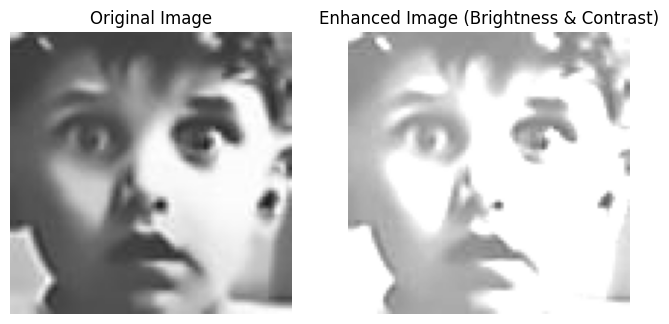

In [ ]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Enhanced_Surprize.jpg'
image_cv = cv2.imread(image_path)

# Convert from BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

# Apply brightness and contrast adjustment using OpenCV
alpha = 1.5  # Contrast control (1.0-3.0)
beta = 50    # Brightness control (0-100)
image_enhanced_cv = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

# Plot the original and enhanced images side by side
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_enhanced_cv)
plt.title("Enhanced Image (Brightness & Contrast)")
plt.axis("off")

# Show the plot
plt.show()


Task 2:Segment facial features to isolate eyes, mouth, and other key components.

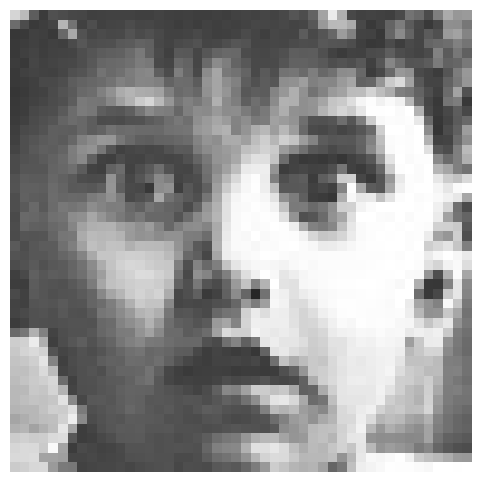

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert the image to grayscale for feature detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar cascades for face, eyes, mouth, and nose detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_nose.xml')

# Detect the face
faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)
for (x, y, w, h) in faces:
    # Draw rectangle around the face for reference (optional)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Extract face region of interest (ROI) for eye, nose, and mouth detection
    face_roi = gray_image[y:y+h, x:x+w]
    color_face_roi = image[y:y+h, x:x+w]

    # Detect eyes within the face ROI
    eyes = eye_cascade.detectMultiScale(face_roi)
    for (ex, ey, ew, eh) in eyes:
        # Mark the center of each eye with a circle
        center_x, center_y = x + ex + ew//2, y + ey + eh//2
        radius = ew // 4
        cv2.circle(image, (center_x, center_y), radius, (0, 255, 0), 2)

    # Detect nose within the face ROI
    noses = nose_cascade.detectMultiScale(face_roi, 1.3, 5)
    for (nx, ny, nw, nh) in noses:
        # Mark the center of the nose with a circle
        center_x, center_y = x + nx + nw//2, y + ny + nh//2
        radius = nw // 4
        cv2.circle(image, (center_x, center_y), radius, (255, 165, 0), 2)
        break  # Typically, there's only one nose, so we break after finding the first one

    # Detect mouth within the face ROI
    mouths = mouth_cascade.detectMultiScale(face_roi, 1.7, 11)
    for (mx, my, mw, mh) in mouths:
        # Ensure the mouth is below the eyes by checking the y-coordinate
        if y + int(h/2) < y + my < y + h:
            # Mark the center of the mouth with a circle
            center_x, center_y = x + mx + mw//2, y + my + mh//2
            radius = mw // 4
            cv2.circle(image, (center_x, center_y), radius, (0, 0, 255), 2)
            break

# Display the output with detected features marked by circles
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



Task 3: Detect edges to analyze facial structures and expressions.

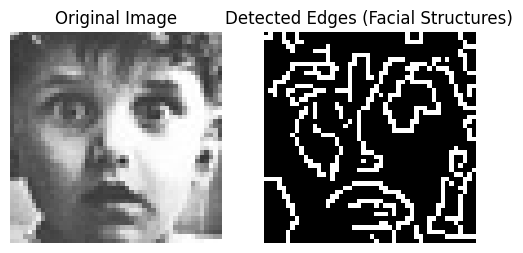

In [ ]:
# Load the image
# Step 1: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian blur to smooth the image and reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=59, threshold2=150)

# Save the results
cv2.imwrite('/content/drive/MyDrive/facial_edges.jpg', edges)

# Display the results
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Edges (Facial Structures)')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


Task 4: Use image blurring to soften non-essential features while keeping the focus on facial expressions.

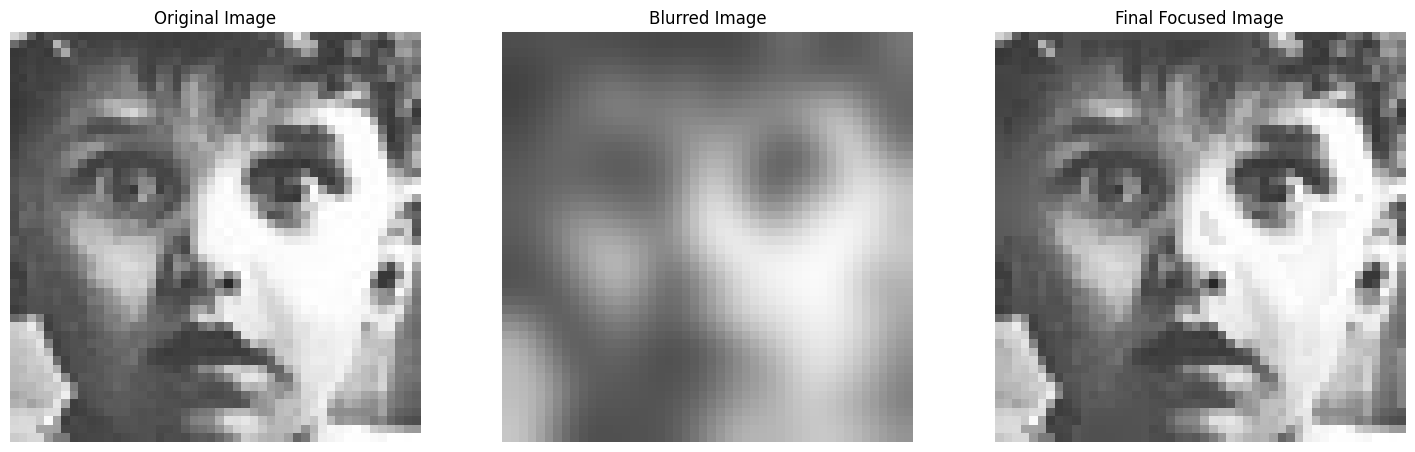

In [ ]:
# Step 1: Apply Gaussian Blur to the entire image
blurred = cv2.GaussianBlur(image, (15, 15), 0)

# Step 2: Convert the original image to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Use Canny Edge Detection to focus on facial structures
edges = cv2.Canny(gray, 50, 150)

# Step 4: Create a mask from the edges (optional: dilate for better focus areas)
mask = cv2.dilate(edges, kernel=np.ones((5, 5), np.uint8), iterations=1)

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Step 5: Retain sharp details in regions corresponding to facial expressions
focused_area = cv2.bitwise_and(image, image, mask=mask)
softened_background = cv2.bitwise_and(blurred, blurred, mask=mask_inv)

# Combine focused facial features and blurred background
final_image = cv2.add(focused_area, softened_background)

# Save the final result
cv2.imwrite('/content/drive/MyDrive/focused_blur_image.jpg', final_image)

# Display the results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Blurred Image')
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Final Focused Image')
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
